In [41]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
from IPython.display import HTML
import random
import math



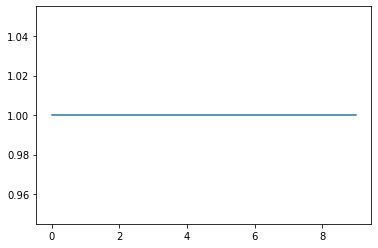

In [11]:
pp.plot(data["1:Person"])

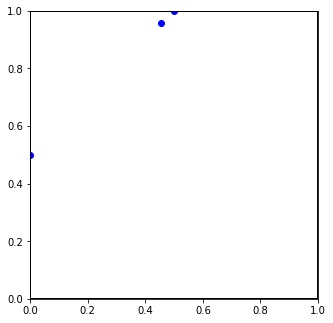

In [83]:
fig = plt.figure()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(0, 1), ylim=(0, 1))

# particles holds the locations of the particles
particles, = ax.plot([], [], 'bo', ms=6)

# rect is the box edge
rect = plt.Rectangle([0,0],
                     1,
                     1,
                     ec='none', lw=2, fc='none')

ax.add_patch(rect)
class Person:
    def __init__(this):
        this.x = random.uniform(0, 1)
        this.y = random.uniform(0, 1)
        this.state = "doors"
        this.states = ["doors","random"]
        this.transitions = [
            [.99,.01],
            [.01,.99]
        ]
        this.speed = .05
        
    def move(this, doors):
        this.state_transition()
        angle = 0
        if(this.state == "doors"):
            door_angles = [this.angle(x) for x in doors]
            angle = random.choices(door_angles )[0]
        elif(this.state == "random"):
            angle = random.uniform(0, 2*math.pi)
            
        this.x = min(1, max(0 , this.x + this.speed * math.sin(angle))) 
        this.y = min(1,max(0,this.y + this.speed * math.cos(angle)))
        
    def angle(this, thing):
        x= thing.y - this.y
        y= thing.x - this.x
        
        return np.arctan2(y,x)
    
    
    def state_transition(this):
        state_index = this.states.index(this.state)
        this.state = random.choices(this.states,weights = this.transitions[state_index])[0]

class Door:
    def __init__(this, x, y):
        this.x = x
        this.y = y
        
door_1 = Door(0, .5)
door_2 = Door(.5, 1)
person = Person() 
def init():
    """initialize animation"""
    global rect, person
    particles.set_data([person.x, door_1.x, door_2.x],[person.y, door_1.y, door_2.y])
    rect.set_edgecolor('red')
    return particles, rect

def animate(i):
    """perform animation step"""
    global rect, dt, ax, fig
   
    # update pieces of the animation
    rect.set_edgecolor('k')
    person.move([door_1, door_2])
    particles.set_data([person.x, door_1.x, door_2.x],[person.y, door_1.y, door_2.y])
    return particles, rect

ani = animation.FuncAnimation(fig, animate, frames=240*10,
                              interval=10, blit=True, init_func=init)


# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#ani.save('particle_box.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

HTML(ani.to_html5_video())

In [ ]:
move(others){
    state_transition(others)
    pos = this.state(others)
    clean(pos)
}